### Why Seaborn?

- provides a layer of abstraction hence simpler to use
- better aesthetics
- more graphs included
### Seaborn Roadmap

Types of Functions

- Figure Level
- Axis Level

Main Classification

- Relational Plot
- Distribution Plot
- Categorical Plot
- Regression Plot
- Matrix Plot
- Multiplots

https://seaborn.pydata.org/api.html

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [12]:
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [14]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### 1. Relational Plot

- to see the statistical relation between 2 or more variables.
- Bivariate Analysis

Plots under this section

- scatterplot
- lineplot
### 2. Distribution Plots

- used for univariate analysis
- used to find out the distribution
- Range of the observation
- Central Tendency
- is the data bimodal?
- Are there outliers?

Plots under distribution plot

- histplot
- kdeplot
- rugplot

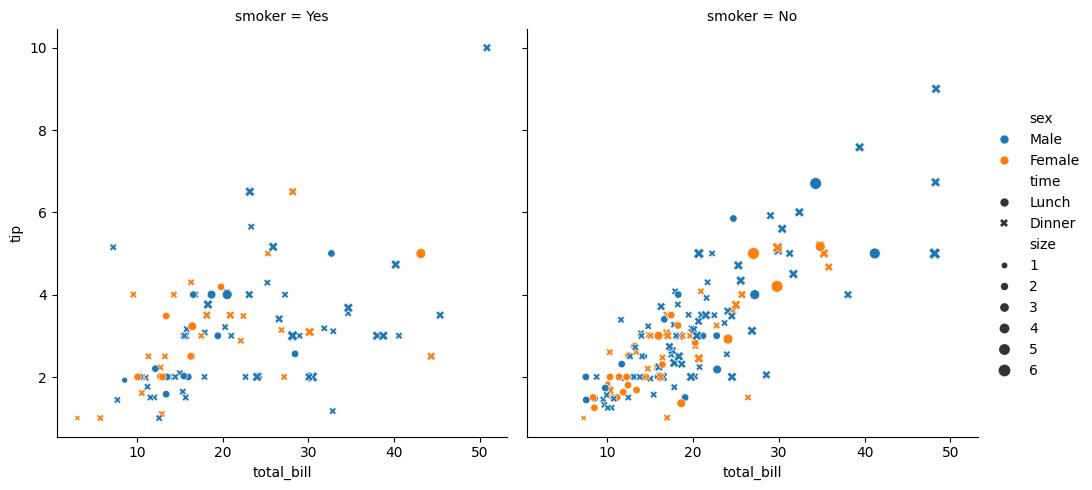

In [17]:
sns.relplot(data=df,x='total_bill',y='tip',hue='sex',col='smoker',size='size',style='time')
plt.show()

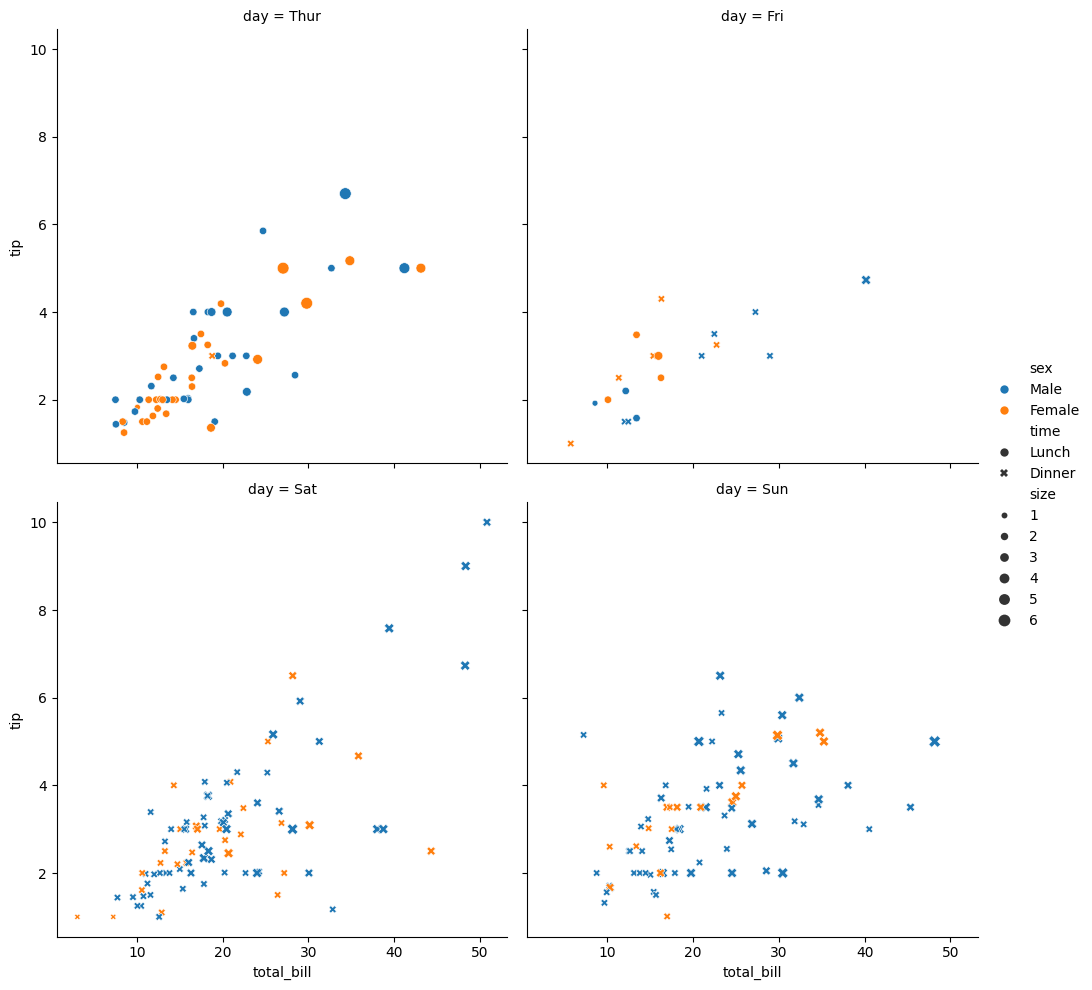

In [19]:
sns.relplot(data=df,x='total_bill',y='tip',hue='sex',col='day',size='size',style='time',col_wrap=2)
plt.show()

### 2. Distribution Plots

- used for univariate analysis
- used to find out the distribution
- Range of the observation
- Central Tendency
- is the data bimodal?
- Are there outliers?

Plots under distribution plot

- histplot
- kdeplot
- rugplot

### 2. Matrix Plot

- Heatmap
- Clustermap